In [101]:
import pandas as pd
df = pd.read_csv('../datasets/dataR2.csv')
df

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  
2     9.27715  554.697               1  
3    12.76600  928.220               1  
4    10.57635  773.920               1  
..        ...      ...             ...  
111  10.96000  268.230               2  
112   7.32000  330.160               2  
113  10.33000  314.050               2  
114   3.27000  392.460               2  
115   4.35000   90.090               2  

[116 rows x 10 columns]

In [102]:
X = df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Adiponectin', 'Resistin', 'MCP.1']]

In [103]:
y = df['Classification']

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[3.69230769e-01, 2.53850329e-01, 7.09219858e-02, 4.90826016e-03,
        0.00000000e+00, 2.21151727e-01, 6.06648498e-02, 2.24659127e-01],
       [9.07692308e-01, 1.14826180e-01, 2.26950355e-01, 1.21903334e-02,
        9.74207040e-03, 1.03706769e-01, 1.08258334e-02, 2.55926278e-01],
       [8.92307692e-01, 2.35277707e-01, 2.19858156e-01, 3.68744199e-02,
        2.20576770e-02, 5.71021092e-01, 7.69064520e-02, 3.07911729e-01],
       [6.76923077e-01, 1.48327833e-01, 1.20567376e-01, 1.41714857e-02,
        5.91126636e-03, 1.51537572e-01, 1.21130688e-01, 5.33933560e-01],
       [9.53846154e-01, 1.35639758e-01, 2.26950355e-01, 1.99364603e-02,
        1.37484705e-02, 8.69399115e-02, 9.33749525e-02, 4.40565365e-01],
       [3.84615385e-01, 2.21906639e-01, 2.26950355e-01, 1.41714857e-02,
        1.07667488e-02, 3.30467695e-01, 9.00950691e-02, 2.93215466e-01],
       [1.00000000e+00, 2.14263533e-01, 1.20567376e-01, 4.03012779e-02,
        1.72224633e-02, 1.08120250e-01, 1.23286855e-01, 7.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 ,test_size=0.2)

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
rfc = LogisticRegression()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

c:\users\raunak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


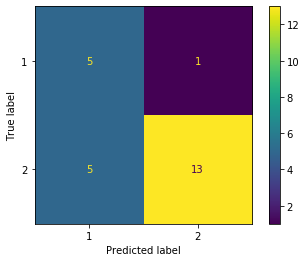

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred)

0.5

In [109]:
recall_score(y_test, y_pred)

0.8333333333333334

In [110]:
f1_score(y_test, y_pred)

0.625

In [111]:
rfc.score(X_train, y_train)

0.8260869565217391

In [112]:
y_pred

array([1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 2], dtype=int64)